In [1]:
import sys
import os
import pandas as pd
from pytablewriter import MarkdownTableWriter
from typing import Dict, List, Any

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

%config Completer.use_jedi = False

In [2]:
#ALGORITHM = ["semantic-zest", "syntactic-zest", "semantic-noguidance", "syntactic-noguidance"]
ALGORITHM = ["semantic-noguidance","semantic-zest", "syntactic-noguidance", "syntactic-zest", "afl"]

RANGE=20 #exclusiove range in python

folder = "expfinalfinal"
base_path = f"c:\\Users\\Alena\\source\\repos\\growe\\{folder}\\"


pdf_dir=f'pdfs_{folder}/'

if not os.path.exists(os.path.join(".",pdf_dir)):
    os.mkdir(os.path.join(".",pdf_dir))


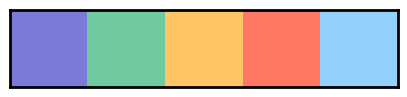

In [3]:

sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_context("paper", font_scale=1.5)

plt.rcParams.update({'axes.edgecolor': 'black', 'axes.linewidth': 2, 
                     'axes.grid': False, 'grid.linestyle': '--'})
colors = ['#7a7ad8', '#6fcb9f', '#ffc663', '#ff7863', '#93d0fc']
sns.palplot(colors)
sns.set_palette(sns.color_palette(colors), 8, .75)
sub_figure_title = {"fontweight": 700, 'fontname':'Arial', 'fontsize': 18}
#plt.tight_layout()


In [4]:

def process_cov_data(path: str) -> List[str]:
    with open(path) as f:
        return f.readlines()

In [5]:
#read cov-all and cov-valid

cov_data_count = {
    "algo": [],
    "type": [],
    "value": []
}

cov_all_data = []
cov_valid_data = []

def read_this(path, typ):
    cov = process_cov_data(path)
    cov_data_count["algo"].append(algorithm)
    cov_data_count["type"].append(typ)
    cov_data_count["value"].append(len(cov))

    if len(cov) > 0: 
        splits = [c.replace('# Covered: (','').split(') ') for c in cov]
        data = np.array(splits)
        cov,calls = data.T
        method=[c.split('()')[0] for c in calls]
        clazz=[c.split('#')[0] for c in method]
        clazz=[c.split('$')[0] for c in clazz]
        
        cov_int = [int(i) for i in cov]
        
        df=pd.DataFrame({'cov':cov_int, 'clazz':clazz,'method':method,'calls':calls})
        df['clazz'] = pd.Categorical(df['clazz'], categories=set(clazz))
        df['method'] = pd.Categorical(df['method'], categories=set(method))
        
        
        #df.columns = ['cov','class']
        df['algorithm']=[algorithm]*len(cov)

        return df
    return pd.DataFrame()
        

for algorithm in ALGORITHM:
    cov_all_data_algo = []
    cov_valid_data_algo = []

    for idx in range(0, RANGE):
        path = os.path.join(base_path, f"nextflow-{algorithm}-{idx}", "errorDir")
        if algorithm == "afl":
            path = os.path.join(base_path, f"nextflow-{algorithm}-{idx}","fuzz-results")
        if not os.path.exists(path):
            continue
        #print(f"processing: {path}")

        #read cov all
        cov_all_path = os.path.join(path, "cov-all.log")
        if not os.path.exists(cov_all_path): continue
        
        df = read_this(cov_all_path,"all")
        if not df.empty: cov_all_data_algo.append(df)

        
        #read cov valid
        cov_valid_path = os.path.join(path, "cov-valid.log")
        if not os.path.exists(cov_valid_path): continue
        
        df = read_this(cov_valid_path,"valid")
        if not df.empty: cov_valid_data_algo.append(df)

    if cov_valid_data_algo:
        cov_valid_data.append(pd.concat( cov_valid_data_algo))
    if cov_all_data_algo:
        cov_all_data.append(pd.concat( cov_all_data_algo))
    

In [6]:
    
cov_valid_data = pd.concat( cov_valid_data)
cov_all_data = pd.concat( cov_all_data)

In [7]:
cov_all_data[cov_all_data['algorithm'] == 'stream-zest']

Empty DataFrame
Columns: [cov, clazz, method, calls, algorithm]
Index: []

C:\Users\Alena\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Alena\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


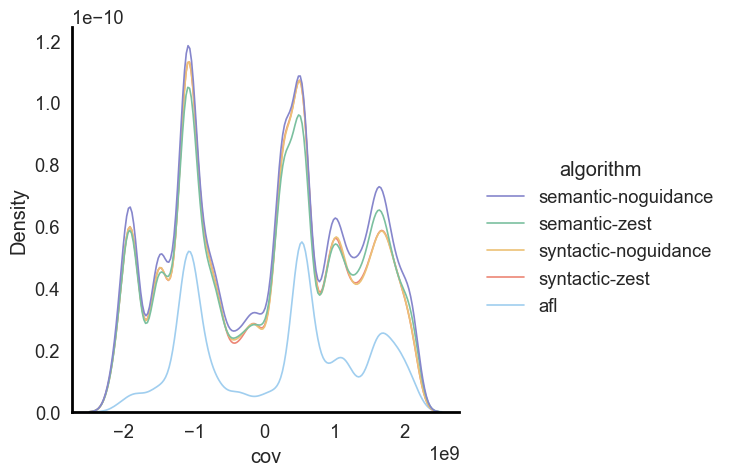

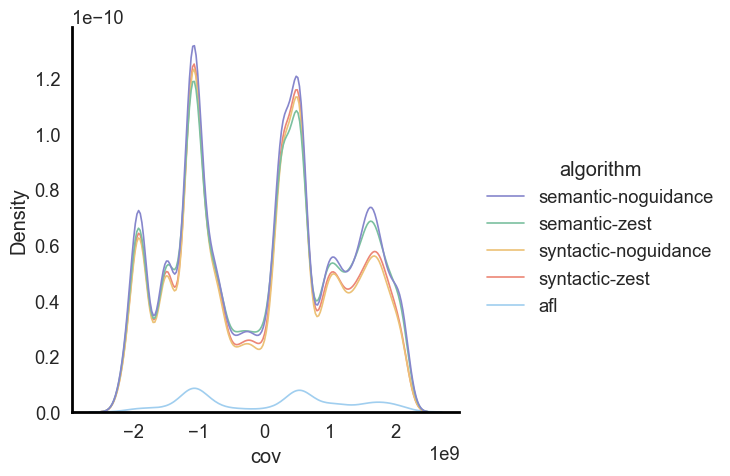

In [8]:
sns.displot(cov_all_data, x='cov', hue="algorithm", kind='kde')
sns.displot(cov_valid_data, x='cov', hue="algorithm", kind='kde')


C:\Users\Alena\AppData\Local\Temp\ipykernel_9964\3432351924.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha='right')


[Text(0, 0, ''),
 Text(1, 0, 'nextflow/Channel'),
 Text(2, 0, 'nextflow/Const'),
 Text(3, 0, 'nextflow/Global'),
 Text(4, 0, 'nextflow/ISession'),
 Text(5, 0, 'nextflow/NF'),
 Text(6, 0, 'nextflow/NextflowMeta'),
 Text(7, 0, 'nextflow/Session'),
 Text(8, 0, 'nextflow/SysEnv'),
 Text(9, 0, 'nextflow/ast/ASTHelpers'),
 Text(10, 0, 'nextflow/ast/GStringToLazyVisitor'),
 Text(11, 0, 'nextflow/ast/LangHelpers'),
 Text(12, 0, 'nextflow/ast/NextflowDSLImpl'),
 Text(13, 0, 'nextflow/ast/NextflowXformImpl'),
 Text(14, 0, 'nextflow/ast/OpXformImpl'),
 Text(15, 0, 'nextflow/ast/TaskCmdXform'),
 Text(16, 0, 'nextflow/ast/TaskCmdXformVisitor'),
 Text(17, 0, 'nextflow/ast/TaskTemplateVarsXformImpl'),
 Text(18, 0, 'nextflow/ast/TaskTemplateVisitor'),
 Text(19, 0, 'nextflow/ast/VariableVisitor'),
 Text(20, 0, 'nextflow/cache/CacheDB'),
 Text(21, 0, 'nextflow/cache/CacheFactory'),
 Text(22, 0, 'nextflow/cache/DefaultCacheFactory'),
 Text(23, 0, 'nextflow/cache/DefaultCacheStore'),
 Text(24, 0, 'nextflo

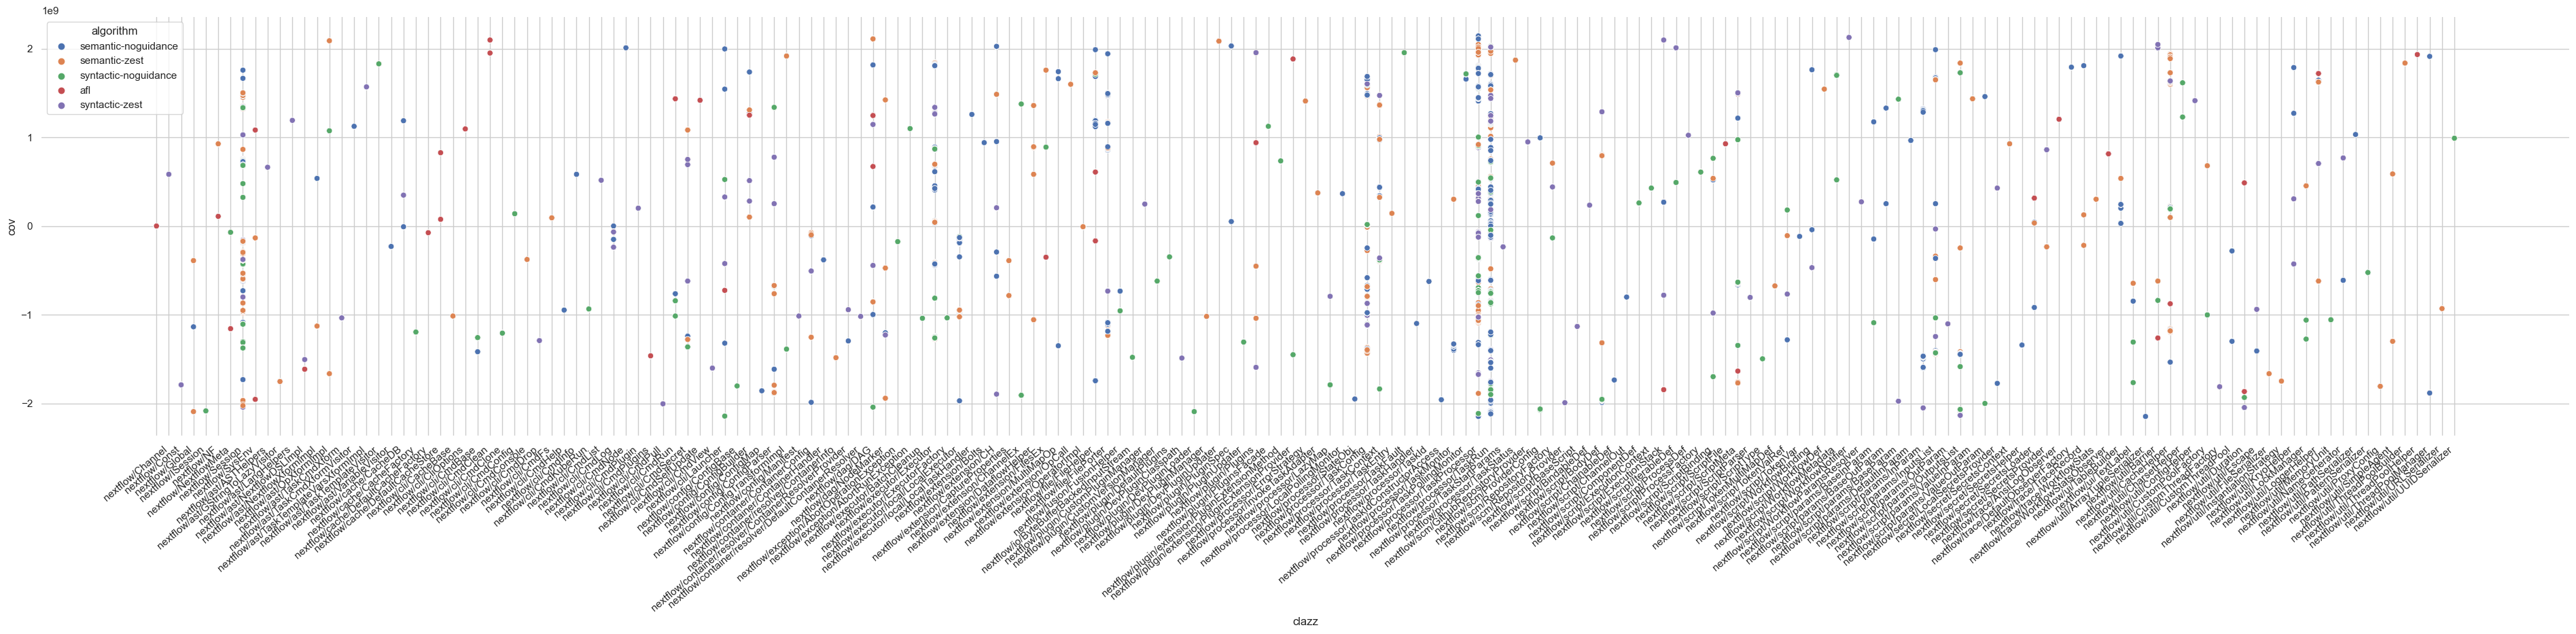

In [9]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(48, 8))
sns.despine(f, left=True, bottom=True)
sorted_data= cov_all_data.sort_values(by=['clazz'])
sns.scatterplot(sorted_data,y='cov',x='clazz',hue="algorithm",ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha='right')

C:\Users\Alena\AppData\Local\Temp\ipykernel_9964\1278209148.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha='right')


[Text(0, 0, ''),
 Text(1, 0, 'nextflow/Channel'),
 Text(2, 0, 'nextflow/Const'),
 Text(3, 0, 'nextflow/Global'),
 Text(4, 0, 'nextflow/ISession'),
 Text(5, 0, 'nextflow/NF'),
 Text(6, 0, 'nextflow/NextflowMeta'),
 Text(7, 0, 'nextflow/Session'),
 Text(8, 0, 'nextflow/SysEnv'),
 Text(9, 0, 'nextflow/ast/ASTHelpers'),
 Text(10, 0, 'nextflow/ast/GStringToLazyVisitor'),
 Text(11, 0, 'nextflow/ast/LangHelpers'),
 Text(12, 0, 'nextflow/ast/NextflowDSLImpl'),
 Text(13, 0, 'nextflow/ast/NextflowXformImpl'),
 Text(14, 0, 'nextflow/ast/OpXformImpl'),
 Text(15, 0, 'nextflow/ast/TaskCmdXform'),
 Text(16, 0, 'nextflow/ast/TaskCmdXformVisitor'),
 Text(17, 0, 'nextflow/ast/TaskTemplateVarsXformImpl'),
 Text(18, 0, 'nextflow/ast/TaskTemplateVisitor'),
 Text(19, 0, 'nextflow/ast/VariableVisitor'),
 Text(20, 0, 'nextflow/cache/CacheDB'),
 Text(21, 0, 'nextflow/cache/CacheFactory'),
 Text(22, 0, 'nextflow/cache/DefaultCacheFactory'),
 Text(23, 0, 'nextflow/cache/DefaultCacheStore'),
 Text(24, 0, 'nextflo

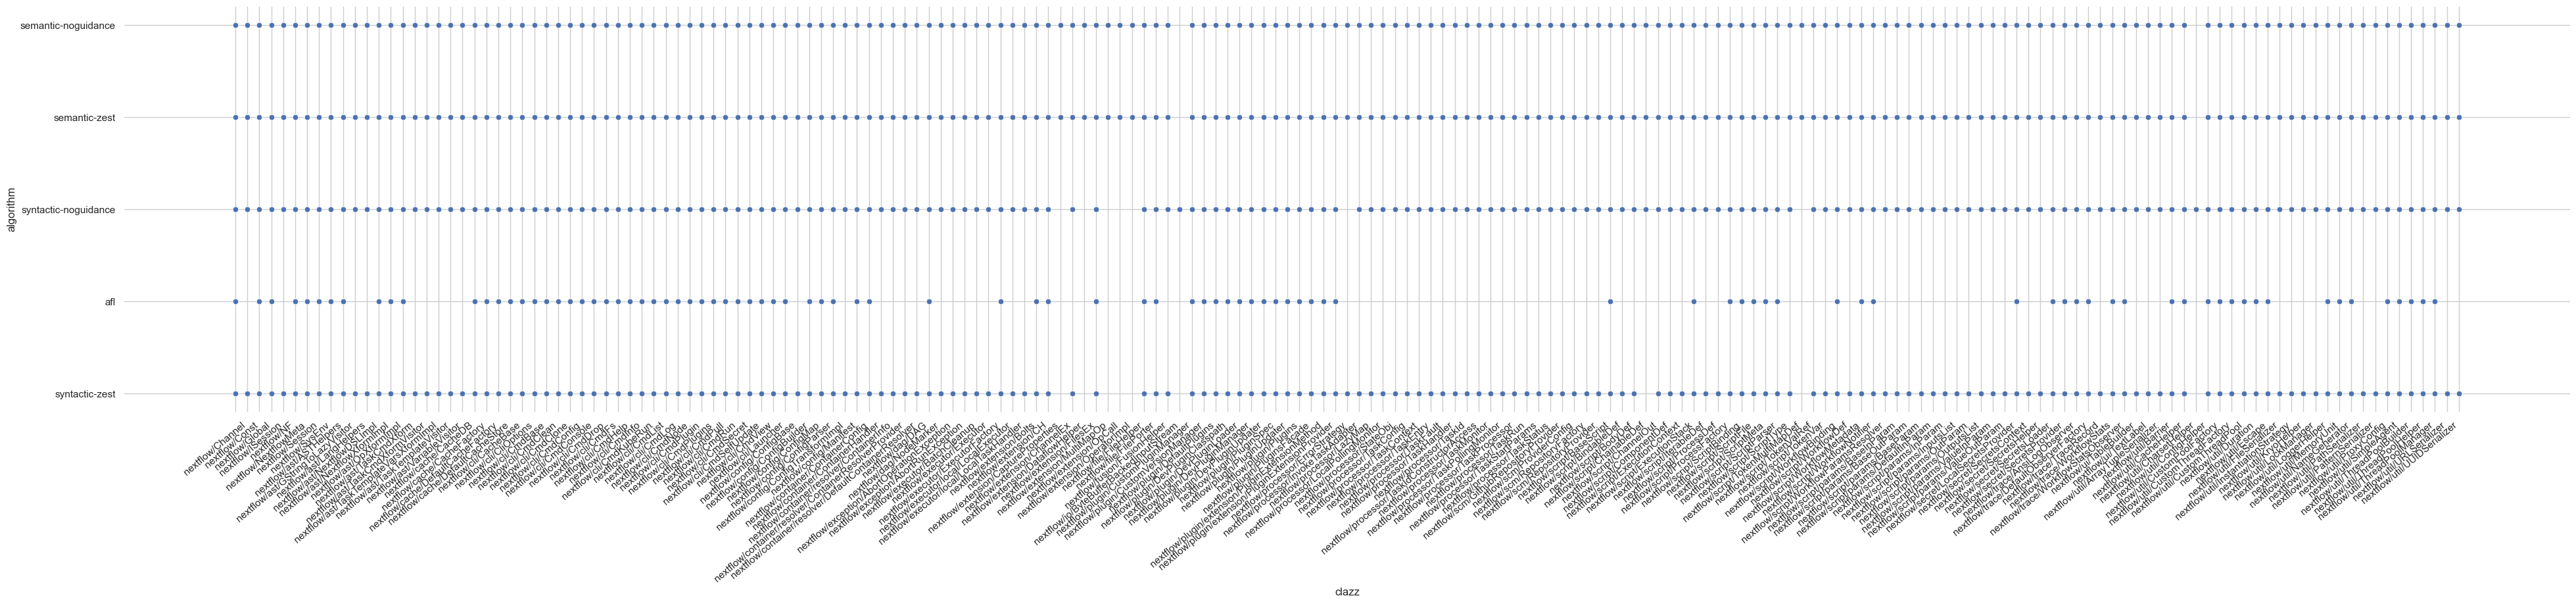

In [10]:
f, ax = plt.subplots(figsize=(48, 8))
sns.despine(f, left=True, bottom=True)
sorted_all_cov=cov_all_data.sort_values(by=['clazz'])
sns.scatterplot(sorted_all_cov,y='algorithm',x='clazz',ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha='right')

C:\Users\Alena\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Alena\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


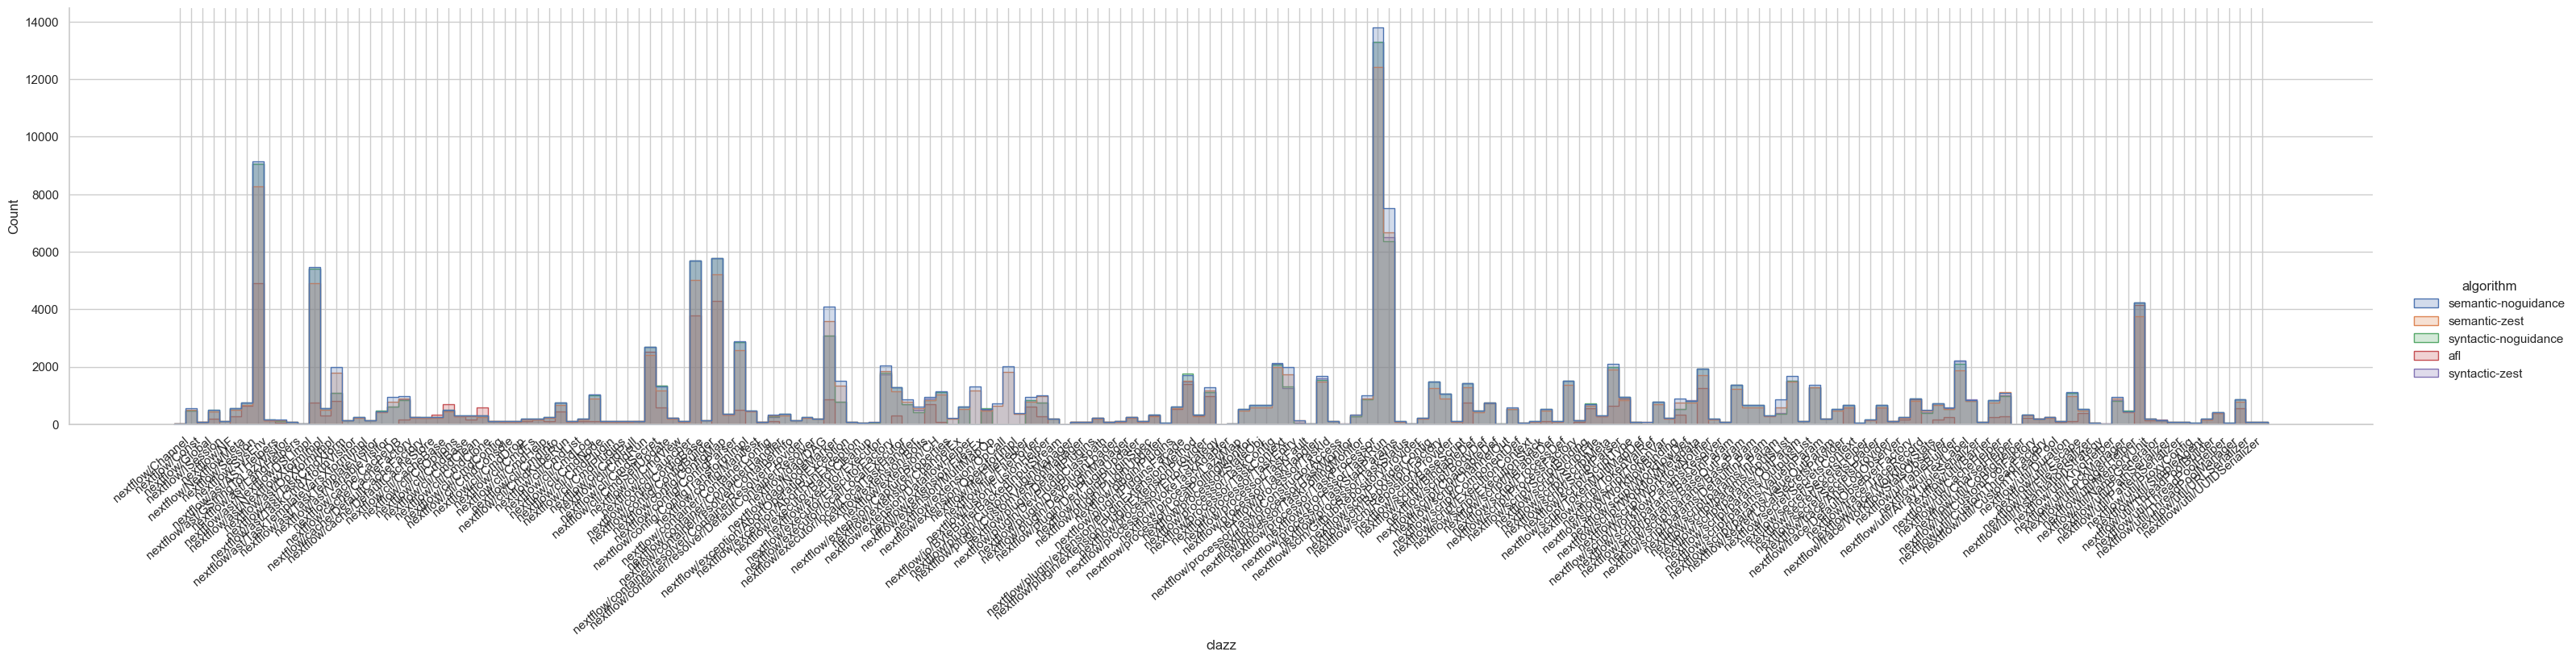

In [11]:
plot = sns.displot(sorted_data,x='clazz',hue="algorithm",height=6, aspect=5,element="step")
plot.tight_layout()

for ax in plot.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_ha('right')
#plot.set_xticklabels(plot.get_xticklabels(), rotation = 40, ha='right')

C:\Users\Alena\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


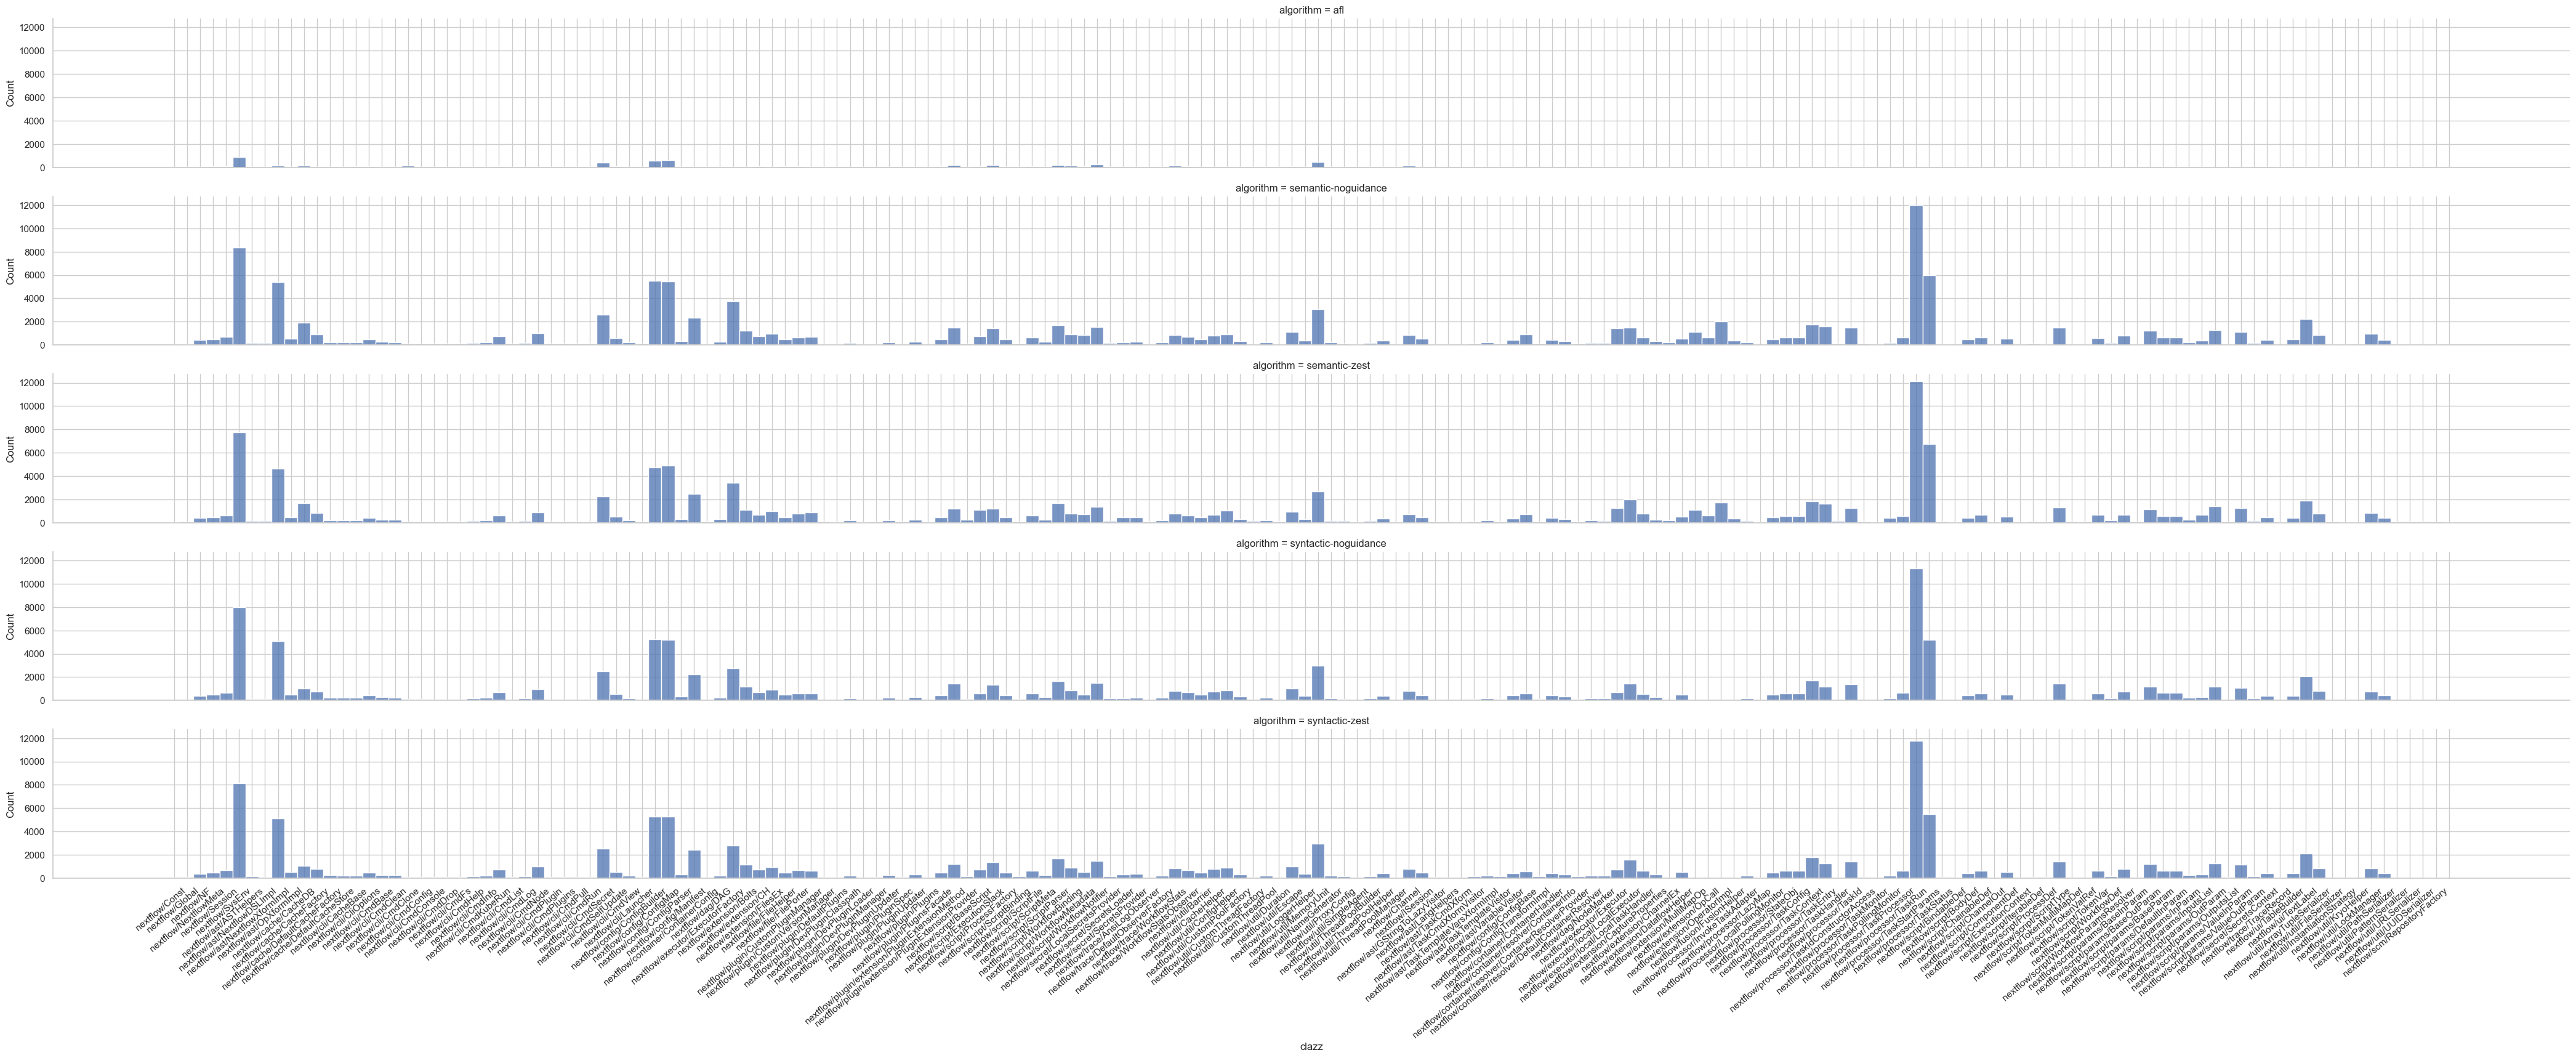

In [12]:

sorted_val_cov=cov_valid_data.sort_values(by=['clazz'])

g = sns.FacetGrid(sorted_val_cov, row='algorithm', row_order=sorted(sorted_val_cov['algorithm'].unique()),height=3, aspect=14)
g.map(sns.histplot, 'clazz')
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_ha('right')

In [13]:
from matplotlib_venn import venn2,venn3


def venn2_this(df,column,a,b,on):
# Create subsets for category A and B
    set_a = set(df[df[column].str.contains(a)][on])
    set_b = set(df[df[column].str.contains(b)][on])
    
    # Create a Venn diagram
    venn2([set_a, set_b], (a, b))
    
    # Display the diagram
    plt.title(f'{on} for {a} and {b}')
    plt.show()

def venn3_this(df,column,a,b,c,on):
# Create subsets for category A and B
    set_a = set(df[df[column].str.contains(a)][on])
    set_b = set(df[df[column].str.contains(b)][on])
    set_c = set(df[df[column].str.contains(c)][on])
    
    # Create a Venn diagram
    venn3([set_a, set_b, set_c], (a, b,c))
    
    # Display the diagram
    plt.title(f'{on} for {a}, {b} and {c}')
    plt.show()



532


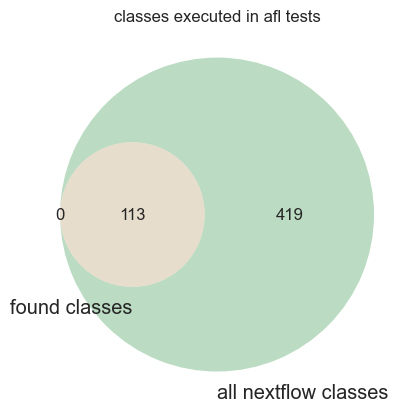

In [14]:
strings_file = "nextflowclasses.txt"


# Create empty output files
found_strings = []
not_found_strings = []
all_classes =[]
algorithm = "afl"
cov_data_set = set(cov_all_data[cov_all_data['algorithm'].str.contains(algorithm)]['calls'].values)
# Read strings from strings_file and search for them in the DataFrame column 'clazz'
with open(strings_file, 'r') as file:
    for line in file:
        search_string = line.strip()
        all_classes.append(search_string)
        if np.any([search_string in entry for entry in cov_data_set]):
            found_strings.append(search_string)
        else:
            not_found_strings.append(search_string)

print(len(all_classes))
plot= venn2([set(found_strings),set(all_classes)],("found classes","all nextflow classes"))
if algorithm=='a' : algorithm ='all' 
plt.title(f'classes executed in {algorithm} tests')
plt.savefig(f"{pdf_dir}/classes_found_{algorithm}.pdf")

In [15]:
sem  = set(cov_all_data[cov_all_data['algorithm'].str.contains('syntactic-noguidance')]['clazz'].values)
syn  = set(cov_all_data[cov_all_data['algorithm'].str.contains('semantic-zest')]['clazz'].values)

for s in syn:
    if s not in sem:
        print(s) 

print('--')

for s in sem:
    if s not in syn:
        print(s) 


nextflow/extension/CaptureProperties
nextflow/extension/OperatorImpl
nextflow/extension/OpCall
nextflow/processor/ErrorStrategy
nextflow/extension/MultiMapOp
nextflow/script/TokenMultiMapDef
nextflow/extension/DataflowHelper
--
nextflow/util/CharsetHelper
nextflow/io/ByteBufferBackedInputStream


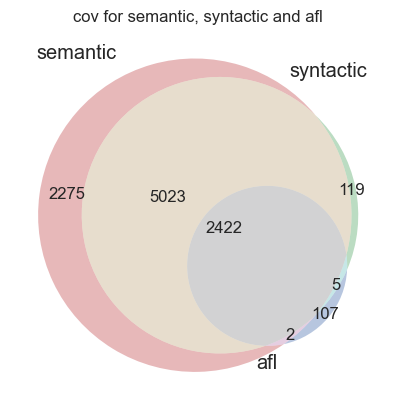

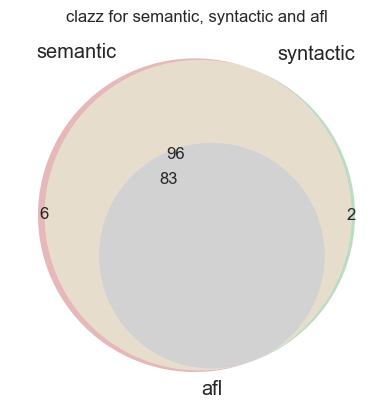

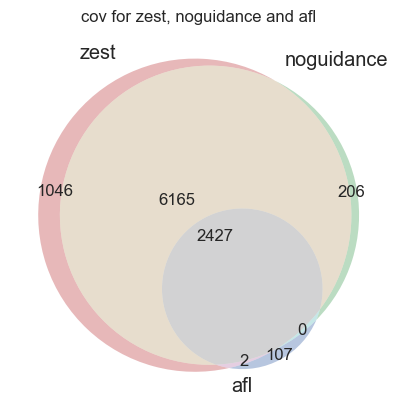

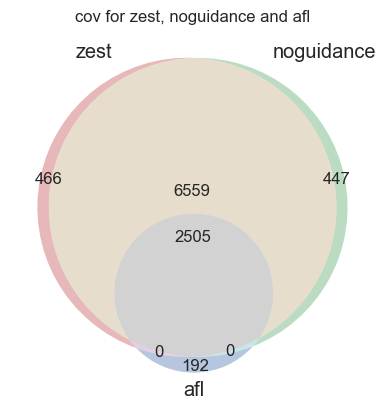

C:\Users\Alena\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib_venn\_venn3.py:61: UserWarning: Circle C has zero area
  warnings.warn("Circle C has zero area")


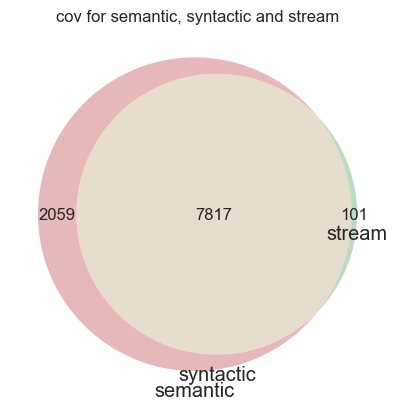

In [16]:
venn3_this(cov_valid_data,'algorithm','semantic','syntactic','afl','cov')
venn3_this(cov_all_data,'algorithm','semantic','syntactic','afl','clazz')

venn3_this(cov_valid_data,'algorithm','zest','noguidance','afl','cov')
venn3_this(cov_all_data,'algorithm','zest','noguidance','afl','cov')

venn3_this(cov_all_data,'algorithm','semantic','syntactic','stream','cov')



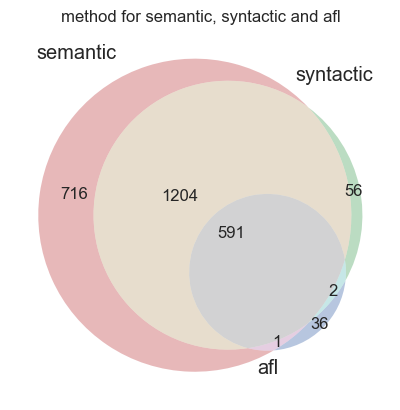

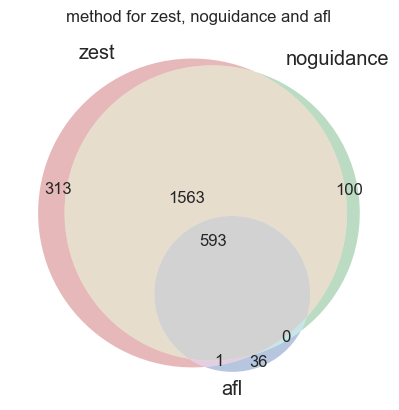

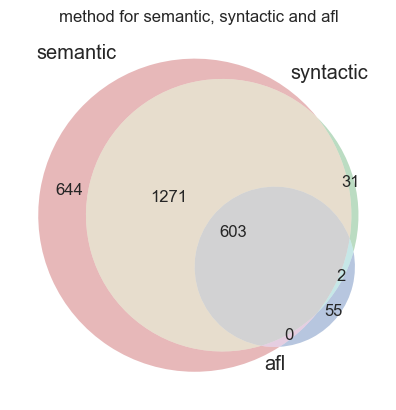

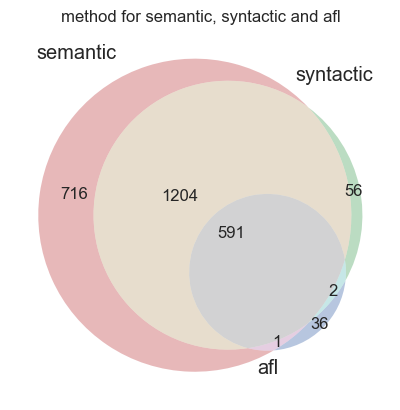

In [17]:
venn3_this(cov_valid_data,'algorithm','semantic','syntactic','afl','method')
venn3_this(cov_valid_data,'algorithm','zest','noguidance','afl','method')

venn3_this(cov_all_data,'algorithm','semantic','syntactic','afl','method')
venn3_this(cov_valid_data,'algorithm','semantic','syntactic','afl','method')

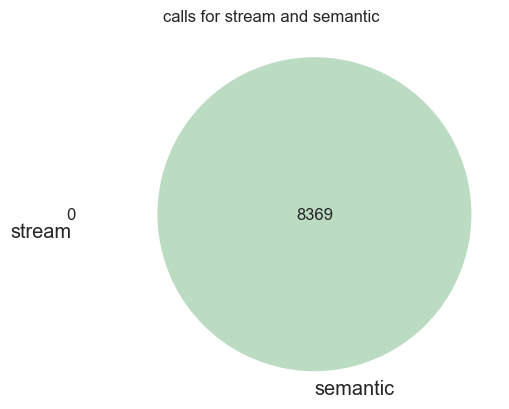

In [18]:
venn2_this(cov_all_data,'algorithm','stream','semantic','calls')


<Axes: >

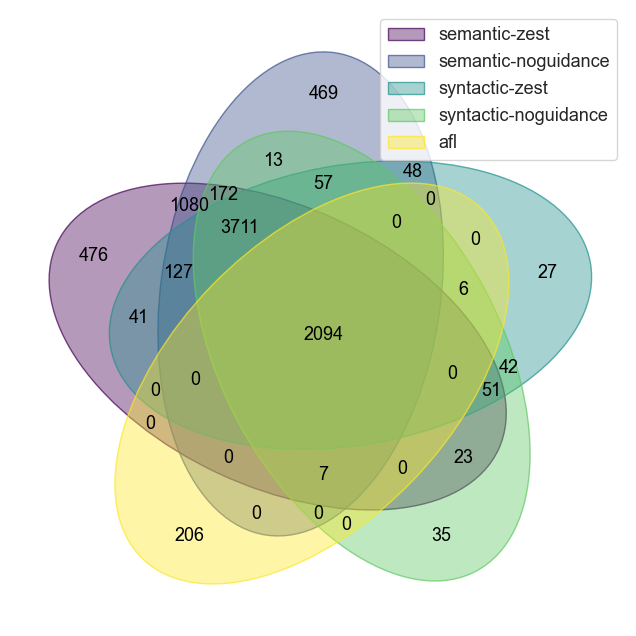

In [19]:
from venn import venn
%matplotlib inline
df=cov_all_data
column='algorithm'
on='calls'
a='semantic-zest'
b='semantic-noguidance'
c='syntactic-zest'
d='syntactic-noguidance'
e='afl'
#f='stream'
data = {
    a : set(df[df[column].str.contains(a)][on]),
    b : set(df[df[column].str.contains(b)][on]),
    c : set(df[df[column].str.contains(c)][on]),
    d : set(df[df[column].str.contains(d)][on]),
    e : set(df[df[column].str.contains(e)][on]),
 #   f : set(df[df[column].str.contains(f)][on]),
    
}

venn(data)


<Axes: >

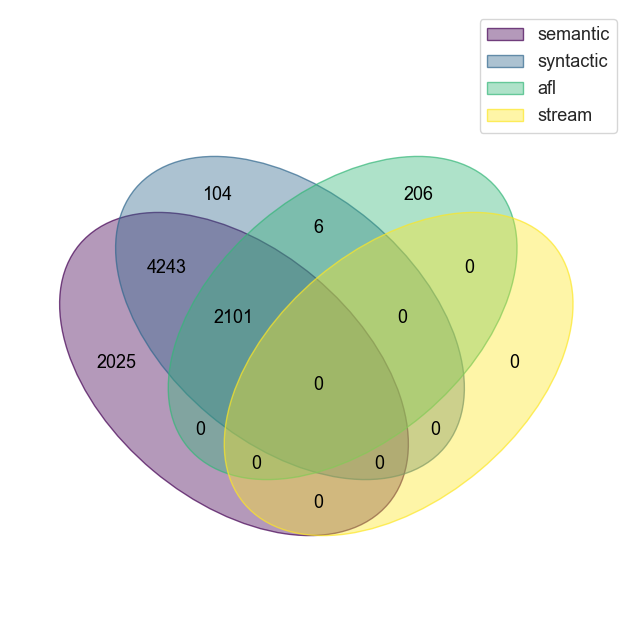

In [20]:
from venn import venn
%matplotlib inline
df=cov_all_data
column='algorithm'
on='calls'
a='semantic'
c='syntactic'
e='afl'
f='stream'
data = {
    a : set(df[df[column].str.contains(a)][on]),
    c : set(df[df[column].str.contains(c)][on]),
    e : set(df[df[column].str.contains(e)][on]),
    f : set(df[df[column].str.contains(f)][on]),
    
}

venn(data)

In [21]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + 10
            value = str(int(p.get_height()))
            ax.text(_x, _y, value, ha="center")

    if isinstance(axs, np.ndarray):
        for _, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

def generate_total_coverage_bar(data: Dict[str, List[Any]], path: str):
    f, ax = plt.subplots(figsize=(8,5))
    pal= sns.color_palette(colors)
    axis = sns.barplot(x="type", y="value", hue="algo", data=data,  hue_order=ALGORITHM, errorbar="se", ax=ax, palette=colors)
    show_values_on_bars(axis)
    axis.legend(loc='center right')
    
    fig = axis.get_figure()
    fig.savefig(path)
    #fig.clf()
    fig.show()



C:\Users\Alena\AppData\Local\Temp\ipykernel_9964\672657233.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


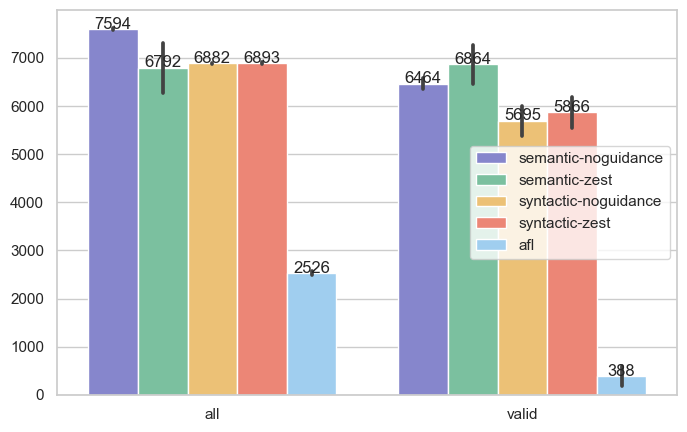

In [22]:

generate_total_coverage_bar(cov_data_count, f'{pdf_dir}/cov_data_count.pdf')


In [23]:
t = (6322+6910+7593+6850)/4
2526/t


0.36509485094850946

In [24]:
t2 =(7251+5000+6569+5167)/4
388/t2

0.06470171342810689